## Import Libraries

In [165]:
import warnings # suppress warnings
warnings.filterwarnings('ignore')

import os
import gc
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from scipy import stats
from pathlib import Path

from sklearn.decomposition import PCA

import plotly.figure_factory as ff
import plotly.express as px

from sklearn.preprocessing import StandardScaler

# Untuk transformasi data menjadi normal 
from sklearn.preprocessing import QuantileTransform



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_scoreer

ImportError: cannot import name 'QuantileTransform' from 'sklearn.preprocessing' (c:\Users\goldw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\__init__.py)

In [ ]:

from sklego.mixture import BayesianGMMClassifier
from sklearn.mixture import BayesianGaussianMixture

from sklearn.preprocessing import MinMaxScaler, PowerTransformer, StandardScaler, RobustScaler, LabelEncoder

# EDA

In [ ]:
# Read the data
data = pd.read_csv('../data/data.csv')

In [ ]:
data.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98000 entries, 0 to 97999
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      98000 non-null  int64  
 1   f_00    98000 non-null  float64
 2   f_01    98000 non-null  float64
 3   f_02    98000 non-null  float64
 4   f_03    98000 non-null  float64
 5   f_04    98000 non-null  float64
 6   f_05    98000 non-null  float64
 7   f_06    98000 non-null  float64
 8   f_07    98000 non-null  int64  
 9   f_08    98000 non-null  int64  
 10  f_09    98000 non-null  int64  
 11  f_10    98000 non-null  int64  
 12  f_11    98000 non-null  int64  
 13  f_12    98000 non-null  int64  
 14  f_13    98000 non-null  int64  
 15  f_14    98000 non-null  float64
 16  f_15    98000 non-null  float64
 17  f_16    98000 non-null  float64
 18  f_17    98000 non-null  float64
 19  f_18    98000 non-null  float64
 20  f_19    98000 non-null  float64
 21  f_20    98000 non-null  float64
 22

In [ ]:
data.describe()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
count,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,...,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000
mean,48999.500000,0.001220,0.005580,-0.001042,-0.000700,-0.003522,-0.001612,-0.003042,5.545918,6.763061,...,-0.004513,-0.000515,-0.001670,-0.038752,-0.220002,0.166434,-0.064309,-0.062540,0.098472,-0.230910
std,28290.307527,1.002801,1.000742,1.001373,1.000422,1.003061,1.000532,0.997434,3.691840,4.152348,...,1.004372,1.002962,0.999703,1.477858,1.494836,1.543014,1.576086,1.428055,1.305407,1.528476
min,0.000000,-4.732235,-4.202795,-4.377021,-4.010826,-4.535903,-4.300767,-4.894525,0.000000,0.000000,...,-4.894525,-4.732235,-4.438130,-6.873999,-8.234305,-7.792363,-6.593842,-7.375719,-7.335556,-6.954151
25%,24499.750000,-0.675226,-0.670985,-0.672779,-0.672540,-0.682510,-0.675066,-0.680421,3.000000,4.000000,...,-0.678773,-0.679777,-0.675147,-1.022964,-1.203204,-0.903385,-1.128966,-0.975680,-0.746489,-1.262606
50%,48999.500000,0.002022,0.006650,-0.000324,-0.003185,-0.003307,0.001024,-0.002053,5.000000,6.000000,...,-0.000587,-0.000806,0.000819,-0.056687,-0.219046,0.167074,-0.099221,-0.070852,0.082230,-0.271319
75%,73499.250000,0.677271,0.677746,0.677086,0.672097,0.677589,0.673344,0.668112,8.000000,9.000000,...,0.672149,0.675437,0.676881,0.930158,0.764690,1.217432,0.987684,0.843212,0.925306,0.770516
max,97999.000000,4.490521,4.324974,4.560247,4.399373,4.050549,4.710316,3.998595,32.000000,30.000000,...,4.560247,4.399373,4.135419,6.517721,6.054831,7.527271,7.544731,7.005608,7.205971,6.977150


In [ ]:
data = data.drop(columns="id")

In [ ]:
sns.set_theme(style="whitegrid")

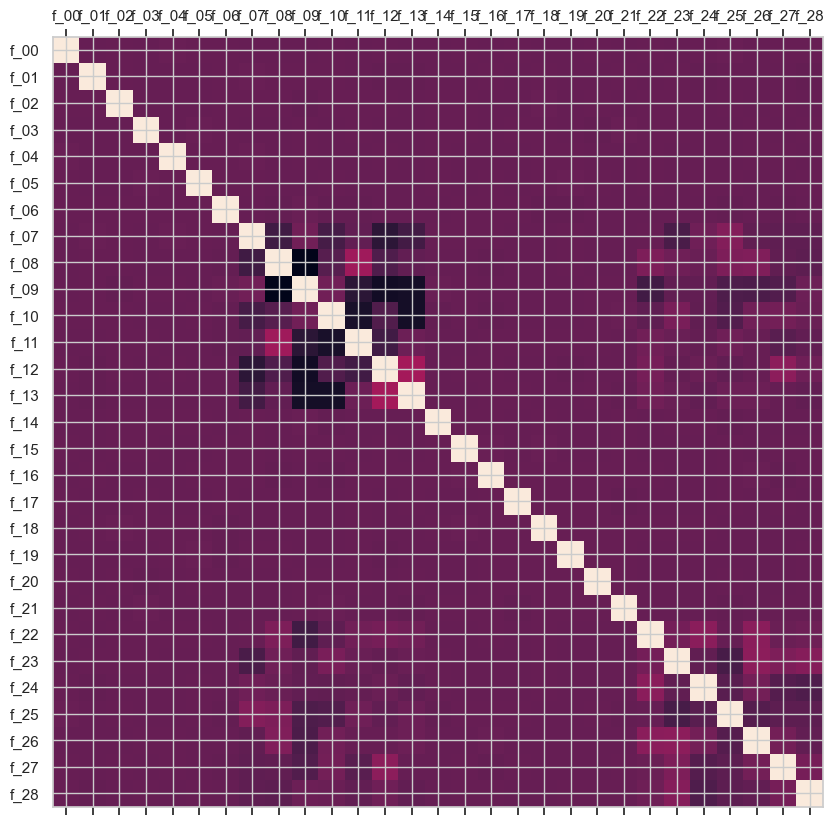

In [ ]:
def plot_corr(df, size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
plot_corr(data)

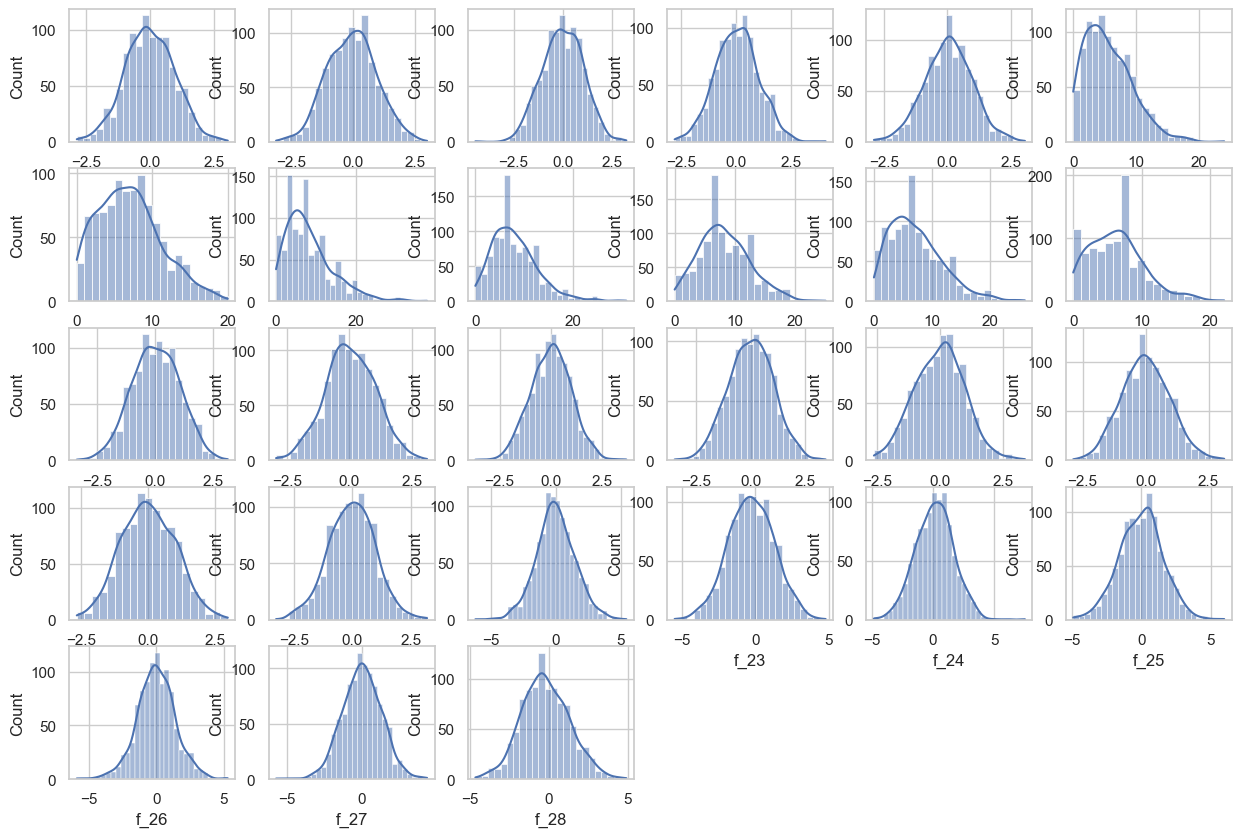

In [ ]:
plt.figure(figsize=(15,10))
columns = data.columns[2:]
for i in range(len(columns)):
    plt.subplot(5,6,i+1)
    p = sns.histplot(x=columns[i], data=data.sample(1000), stat='count', kde=True, palette="deep")

In [ ]:
# Scale the data
scaled = pd.DataFrame(StandardScaler().fit_transform(data), columns=data.columns)
scaled.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,-0.389551,-0.917695,0.649105,0.589499,-0.824775,0.734849,2.267432,-0.960479,1.502035,0.983395,...,-0.471839,-0.754257,-0.762195,-0.711585,0.911572,-0.680948,0.762783,0.960482,1.045296,0.683323
1,-0.688544,-0.459195,0.654321,0.995533,-1.644472,0.864967,-0.087835,-0.960479,-0.906254,-0.371415,...,-0.422434,-0.089129,-1.783073,-0.541815,0.454693,1.032386,-0.133948,-0.552942,0.355435,-1.602671
2,0.805607,0.318753,-1.167963,-0.623531,0.108638,0.785146,1.996476,-0.147872,1.020377,-0.540766,...,-0.407243,-1.597140,1.193015,2.236943,0.088090,-1.513324,-0.577814,0.979171,-0.926250,-2.224327
3,-0.500743,0.223305,0.264788,0.232124,0.417259,-1.219016,0.142257,0.122997,-1.147082,0.814044,...,0.621083,1.284518,0.534669,0.727667,-1.218753,0.825698,-1.164842,-0.397908,-0.114228,0.307002
4,-0.670613,-1.044343,-0.268745,-1.828801,-0.285713,-1.850223,0.786963,0.664735,0.057062,-0.540766,...,-1.617255,-0.433152,0.324273,0.218614,-1.484025,0.847369,-0.622034,1.166086,-0.385886,-1.149094


## Preprocessing

In [ ]:
def scale_transform(data, scaler : str):
    # Menampilkan visualisasi sebelum transformasi
    plt.figure(figsize=(20, 10))
    for i, (column, values) in enumerate(data.items(), 1):
        plt.subplot(5, 6, i)
        plt.hist(values, bins=30, color='blue', alpha=0.7, label='Before Transformation')
        plt.title(f'{column} - Before Transformation')
        plt.legend()
    plt.tight_layout()
    plt.show()

    if(scaler == 'QuantileTransformer'):
        scaler = QuantileTransformer(output_distribution='normal')
    elif(scaler == 'StandardScaler'):
        scaler = StandardScaler()
    elif(scaler == 'RobustScaler'):
        scaler = RobustScaler()
    elif(scaler == 'PowerTransformer'):
        scaler = PowerTransformer()
    
    data_transformed = scaler.fit_transform(pd.DataFrame(data))
    data_transformed = pd.DataFrame(data_transformed, columns=data.keys())

    # Menampilkan visualisasi setelah transformasi
    plt.figure(figsize=(20, 10))
    for i, (column, values) in enumerate(data_transformed.items(), 1):
        plt.subplot(5, 6, i)
        plt.hist(values, bins=30, color='blue', alpha=0.7, label='After Transformation')
        plt.title(f'{column} - After Transformation')
        plt.legend()
    plt.tight_layout()
    plt.show()

    return data_transformed

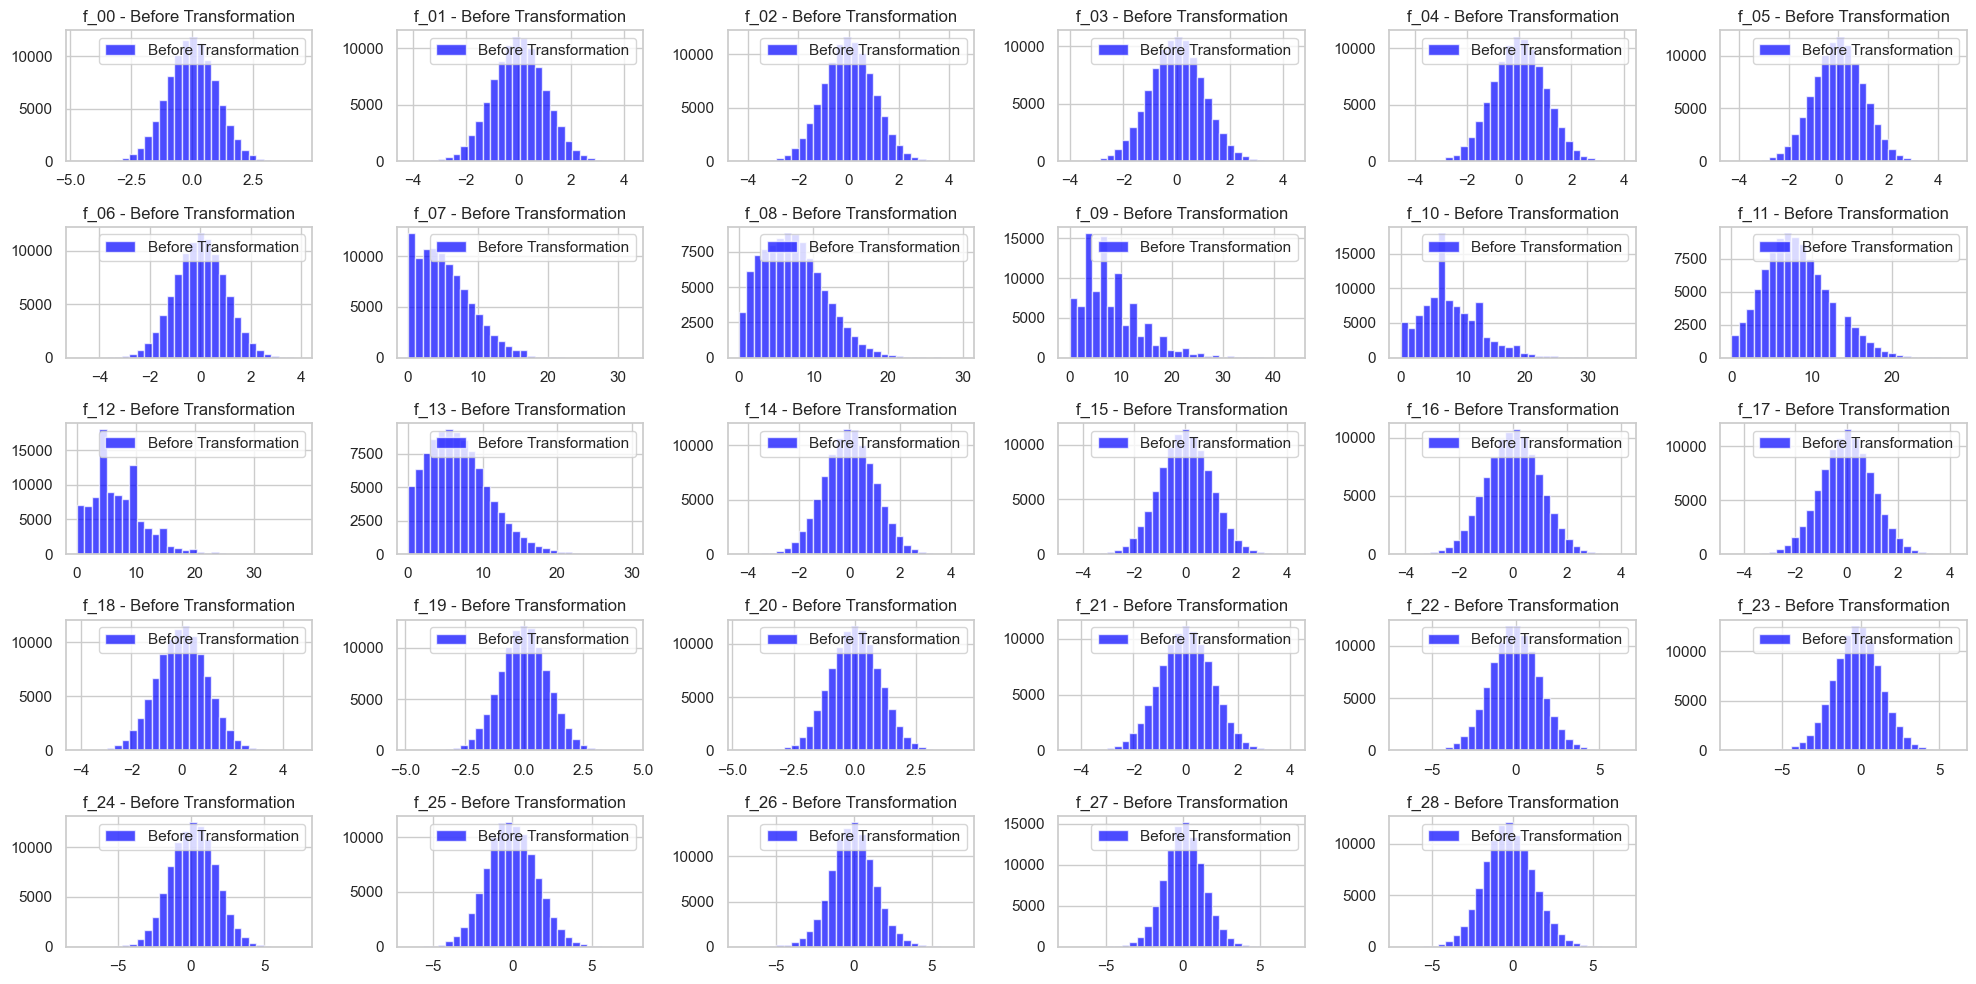

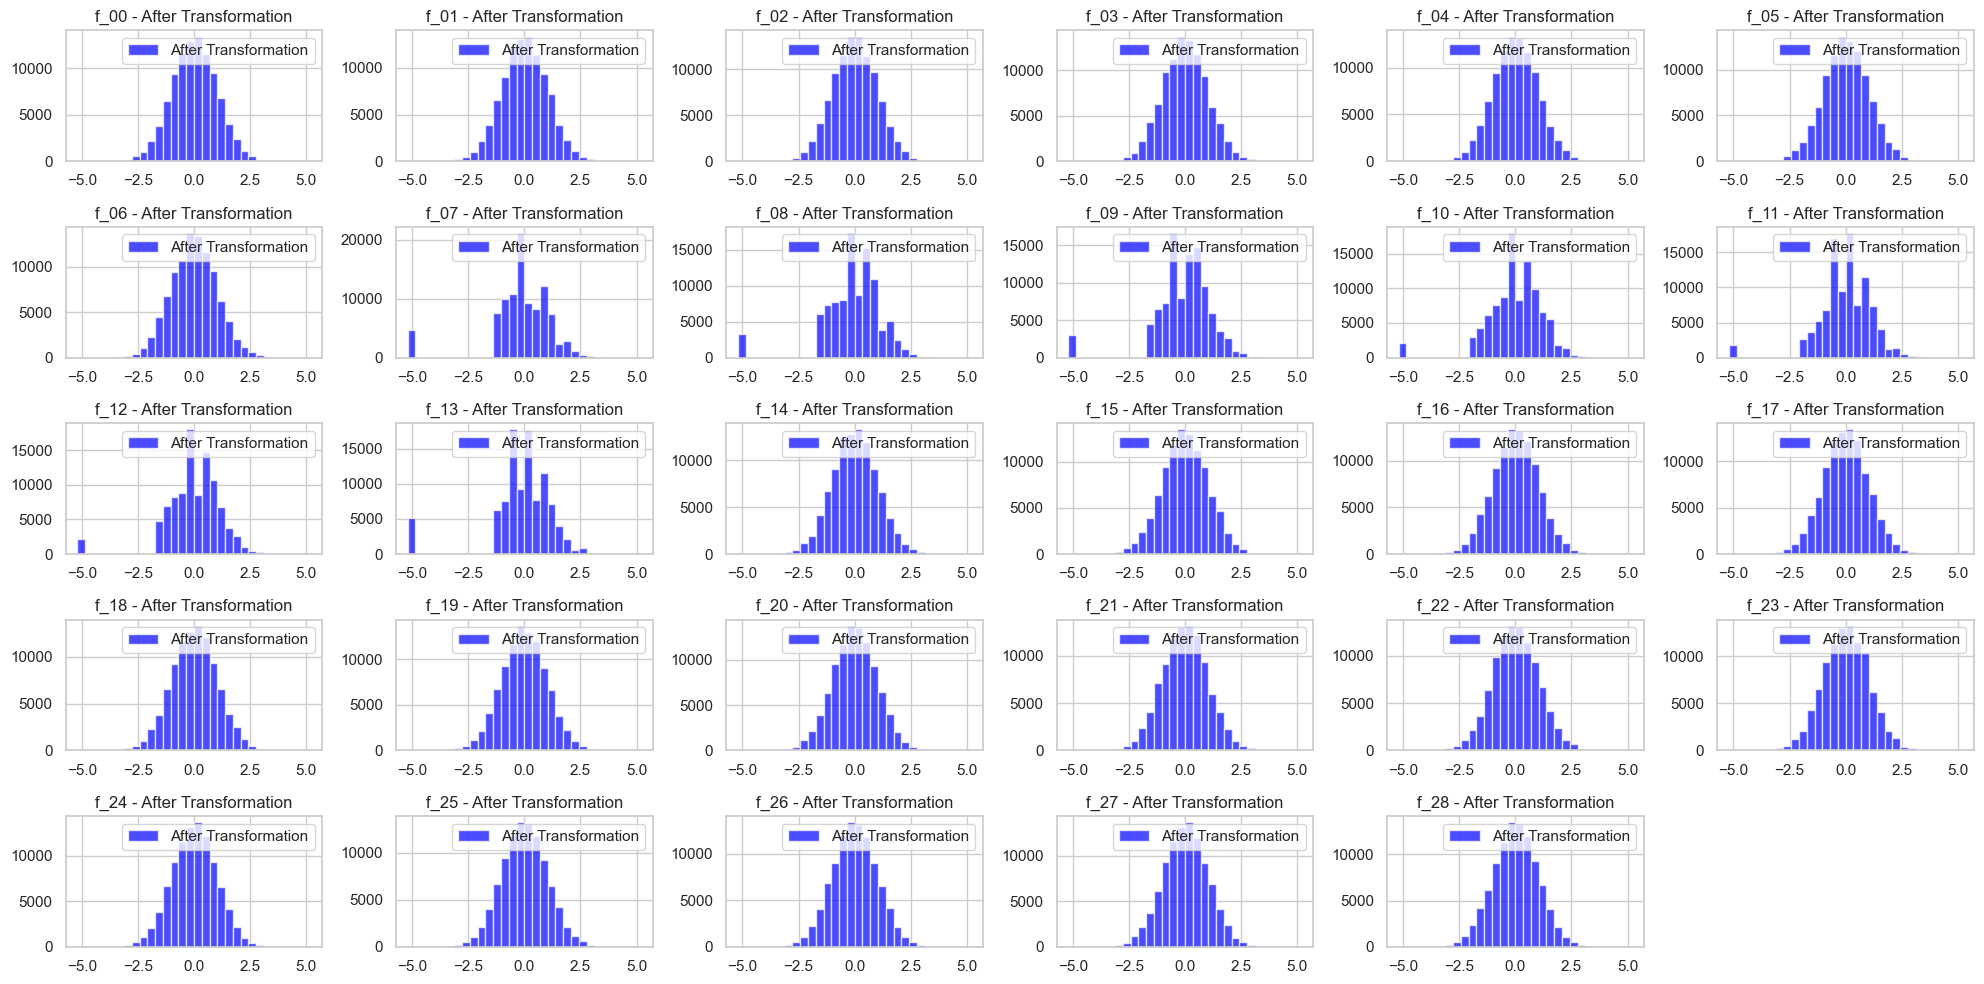

In [ ]:
data_quantile = scale_transform(data, "QuantileTransformer")

In [ ]:
# Feature that is not normal distribution mean that
# Take only the feature that is goo
data2 =  data[["f_07", "f_08", "f_09", "f_10", "f_11", "f_12", "f_13", "f_14"]]
data2.head()

,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14
0,2,13,14,5,13,6,6,-0.469819
1,2,3,6,4,6,16,9,0.591035
2,5,11,5,8,9,3,11,-0.679875
3,6,2,13,8,9,6,4,-0.389456
4,8,7,5,3,1,13,11,-0.120743


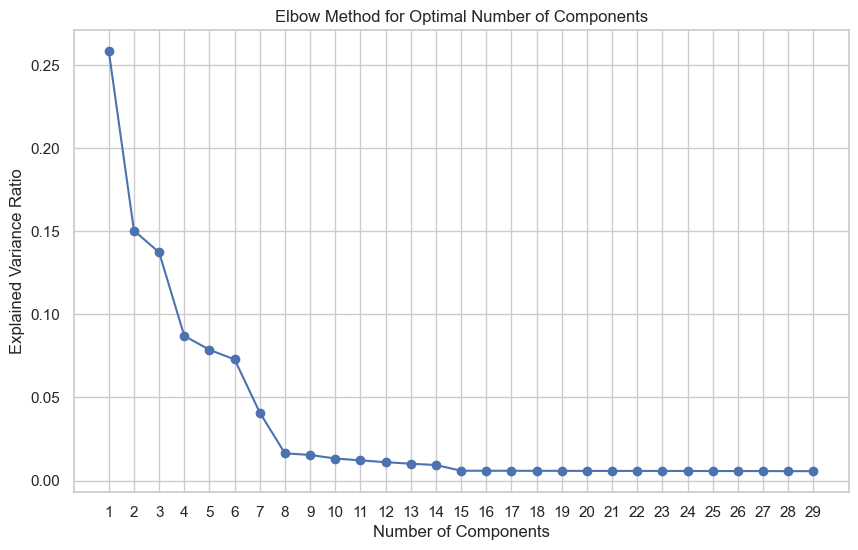

In [ ]:
# Menghitung explained variance untuk setiap jumlah komponen
pca = PCA()
pca.fit(data)
explained_variance = pca.explained_variance_ratio_

# Menampilkan elbow plot dengan sumbu x dimulai dari 1
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(explained_variance) + 1))  # Mengatur ticks pada sumbu x dimulai dari 1
plt.grid(True)
plt.show()

In [ ]:

# Fit several models with different numbers of components
components_min, components_max = 4, 25

result_list = []
for n_components in range(components_min, components_max):
    for seed in range(10):
        gm = GaussianMixture(n_components=n_components, random_state=seed, verbose=0, n_init=1)
        y = gm.fit_predict(scaled)
        bic = gm.bic(scaled)
        aic = gm.aic(scaled)
        #print(f"{n_components:2} {bic:16.5f} {aic:16.5f}")
        result_list.append((n_components, seed, bic, aic, y, gm))

results = pd.DataFrame(result_list, columns=['n_components', 'seed', 'bic', 'aic', 'y', 'gm'])
results = results.set_index(['n_components', 'seed'])

NameError: name 'GaussianMixture' is not defined